In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_rows', 200000)
pd.set_option('display.max_columns', 200)
np.set_printoptions(suppress=True)

In [ ]:
from google.colab import files
files.upload()

Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


{'Test.csv': b'session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out\n0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko,Desktop - IE,2020-01-07,1,0,0\n6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I9305 Carrier/YES OPTUS Type/Mobile,Android Phone - Android,2020-02-13,0,0,0\n3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0\na0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0),Desktop - IE,2020-01-26,0,0,0\ndd8999772b0ab27225fb05e5df2f1da6,231,"Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1700.107 Safari/537.36",Desktop - Chrome,2020-01-29,0,0,0\n0139b339d0fabdef618947f2b877618a,121,"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36",Desktop - Chrome,2019-12-2

In [ ]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [ ]:
train.head(5)

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


In [ ]:
test.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0


In [ ]:
train.shape

(5429, 9)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_id      5429 non-null   object 
 1   session_number  5429 non-null   int64  
 2   client_agent    5269 non-null   object 
 3   device_details  5429 non-null   object 
 4   date            5429 non-null   object 
 5   purchased       5429 non-null   int64  
 6   added_in_cart   5429 non-null   int64  
 7   checked_out     5429 non-null   int64  
 8   time_spent      5429 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 381.9+ KB


In [ ]:
train.nunique()

session_id        5429
session_number     610
client_agent       698
device_details      17
date               342
purchased            2
added_in_cart        2
checked_out          2
time_spent        5235
dtype: int64

In [ ]:
train.isnull().sum()

session_id          0
session_number      0
client_agent      160
device_details      0
date                0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
dtype: int64

In [ ]:
test.isnull().sum()

session_id         0
session_number     0
client_agent      59
device_details     0
date               0
purchased          0
added_in_cart      0
checked_out        0
dtype: int64

In [ ]:
train=train.drop(labels='client_agent', axis=1)
test=test.drop(labels='client_agent', axis=1)

In [ ]:
train['date']=pd.to_datetime(train['date'])
test['date']=pd.to_datetime(test['date'])

In [ ]:
train['year']=train['date'].dt.year
train['month']=train['date'].dt.month
train['day']=train['date'].dt.day

In [ ]:
test['year']=test['date'].dt.year
test['month']=test['date'].dt.month
test['day']=test['date'].dt.day

In [ ]:
test['device_details'].nunique()

16

In [ ]:
print(train.shape)
print(test.shape)

(5429, 14)
(2327, 13)


In [ ]:
train.head()

,session_id,session_number,device_details,date,purchased,added_in_cart,checked_out,time_spent,year,month,day
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Desktop - Chrome,2020-01-22,1,0,0,236.886,2020,1,22
1,a5442b0c7c33d0a811e7661e556b2de8,55,iPhone - iOS,2020-02-27,1,0,0,1277.455,2020,2,27
2,305cb1486ed8610c00b37007926cb2c4,11,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,2019,8,1
3,f2c1ecc9993f0071df91ba178450498c,2794,Desktop - IE,2019-12-30,0,1,0,455.201,2019,12,30
4,e460830ae295e55d2216ebdc761ab9a6,3674,iPhone - Web,2019-09-10,0,0,0,1164.877,2019,9,10


In [ ]:
test.head()

,session_id,session_number,device_details,date,purchased,added_in_cart,checked_out,year,month,day
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Desktop - IE,2020-01-07,1,0,0,2020,1,7
1,6bc696d99954e4f1367e845465186aef,935,Android Phone - Android,2020-02-13,0,0,0,2020,2,13
2,3d8611a5ea0f621d205b67f09f663a89,902,iPhone - iOS,2019-10-14,1,0,0,2019,10,14
3,a0351545c032fd0da36289410c6c3354,3223,Desktop - IE,2020-01-26,0,0,0,2020,1,26
4,dd8999772b0ab27225fb05e5df2f1da6,231,Desktop - Chrome,2020-01-29,0,0,0,2020,1,29


In [ ]:
train["purchased_MinPrice"] = train.groupby(['purchased'])['time_spent'].transform('min')
purchased_MinPrice = train.groupby(['purchased'])['time_spent'].min().to_dict()
test['purchased_MinPrice'] = test['purchased'].apply(lambda x:purchased_MinPrice.get(x,0))


train["added_in_cart_MaxPrice"] = train.groupby(['added_in_cart'])['time_spent'].transform('max')
added_in_cart_MaxPrice = train.groupby(['added_in_cart'])['time_spent'].max().to_dict()
test['added_in_cart_MaxPrice'] = test['added_in_cart'].apply(lambda x:added_in_cart_MaxPrice.get(x,0))



train["checked_out_mean"] = train.groupby(['checked_out'])['time_spent'].transform('mean')
checked_out_mean = train.groupby(['checked_out'])['time_spent'].mean().to_dict()
test['checked_out_mean'] = test['checked_out'].apply(lambda x:checked_out_mean.get(x,0))




In [ ]:
df=train.append(test)

In [ ]:
import re
import plotly as px
import seaborn as sns

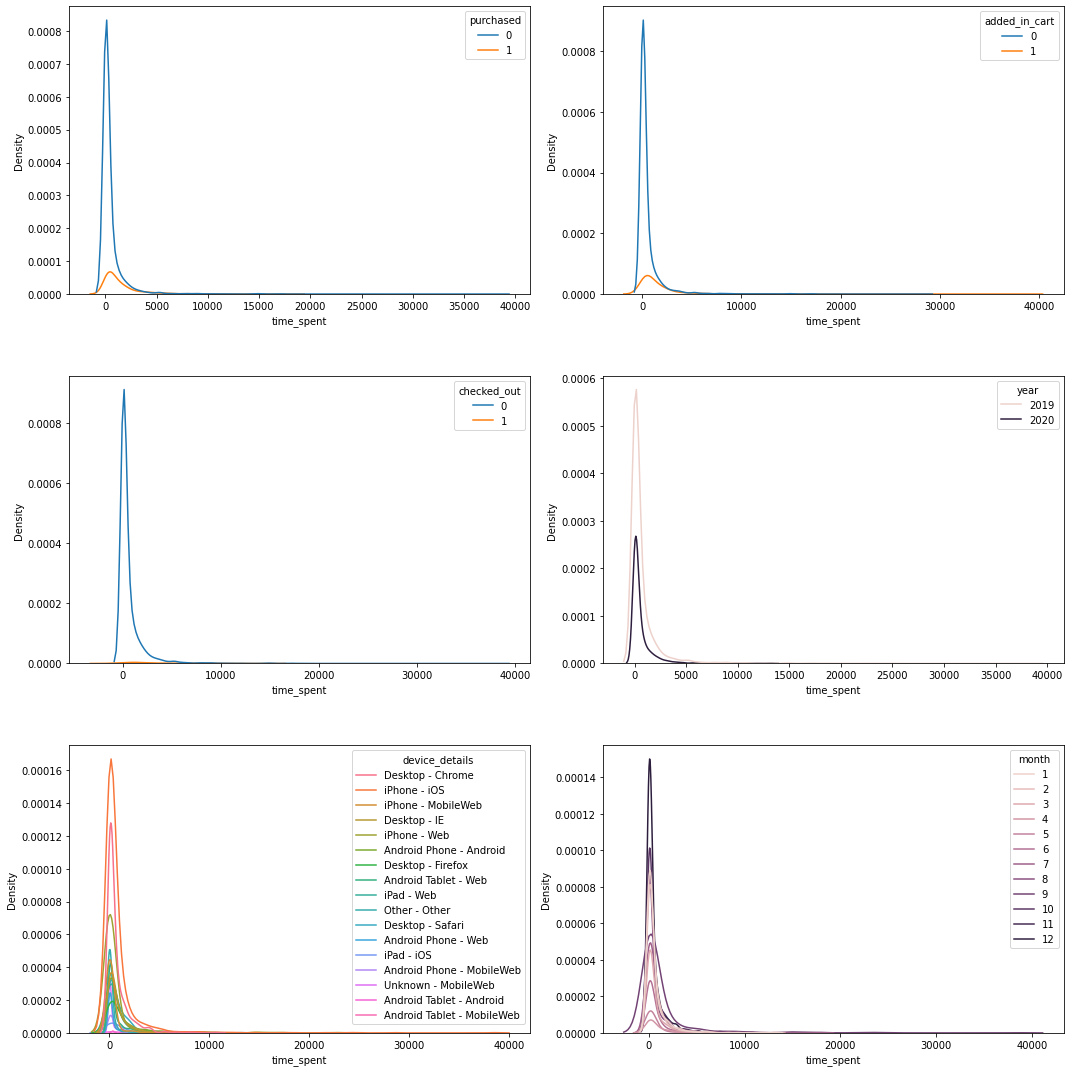

In [ ]:
fig,axs = plt.subplots(3,2,figsize=(15,15))
sns.kdeplot( x="time_spent", hue="purchased",data=df,ax=axs[0, 0])
sns.kdeplot( x="time_spent", hue="added_in_cart",data=df,ax=axs[0, 1])
sns.kdeplot( x="time_spent", hue="checked_out",data=df,ax=axs[1, 0])
sns.kdeplot( x="time_spent", hue="year",data=df,ax=axs[1, 1])
sns.kdeplot( x="time_spent", hue="device_details",data=df,ax=axs[2, 0])
sns.kdeplot( x="time_spent", hue="month",data=df,ax=axs[2, 1])
fig.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7756 entries, 0 to 2326
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   session_id              7756 non-null   object        
 1   session_number          7756 non-null   int64         
 2   device_details          7756 non-null   object        
 3   date                    7756 non-null   datetime64[ns]
 4   purchased               7756 non-null   int64         
 5   added_in_cart           7756 non-null   int64         
 6   checked_out             7756 non-null   int64         
 7   time_spent              5429 non-null   float64       
 8   year                    7756 non-null   int64         
 9   month                   7756 non-null   int64         
 10  day                     7756 non-null   int64         
 11  purchased_MinPrice      7756 non-null   float64       
 12  added_in_cart_MaxPrice  7756 non-null   float64 

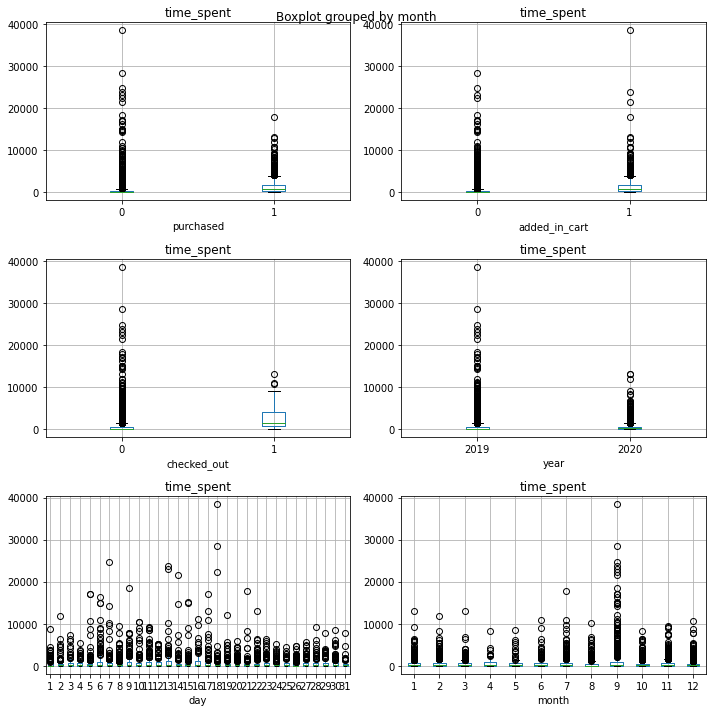

In [ ]:
fig,axs = plt.subplots(3,2,figsize=(10,10))
df.boxplot(column='time_spent',by='purchased', figsize=(25,10), ax=axs[0, 0])
df.boxplot(column='time_spent',by='added_in_cart', figsize=(25,10), ax=axs[0, 1])
df.boxplot(column='time_spent',by='checked_out', figsize=(25,10), ax=axs[1, 0])
df.boxplot(column='time_spent',by='year', figsize=(25,10), ax=axs[1, 1])
df.boxplot(column='time_spent',by='day', figsize=(25,10), ax=axs[2, 0])
df.boxplot(column='time_spent',by='month', figsize=(25,10), ax=axs[2, 1])
fig.tight_layout()
plt.show()

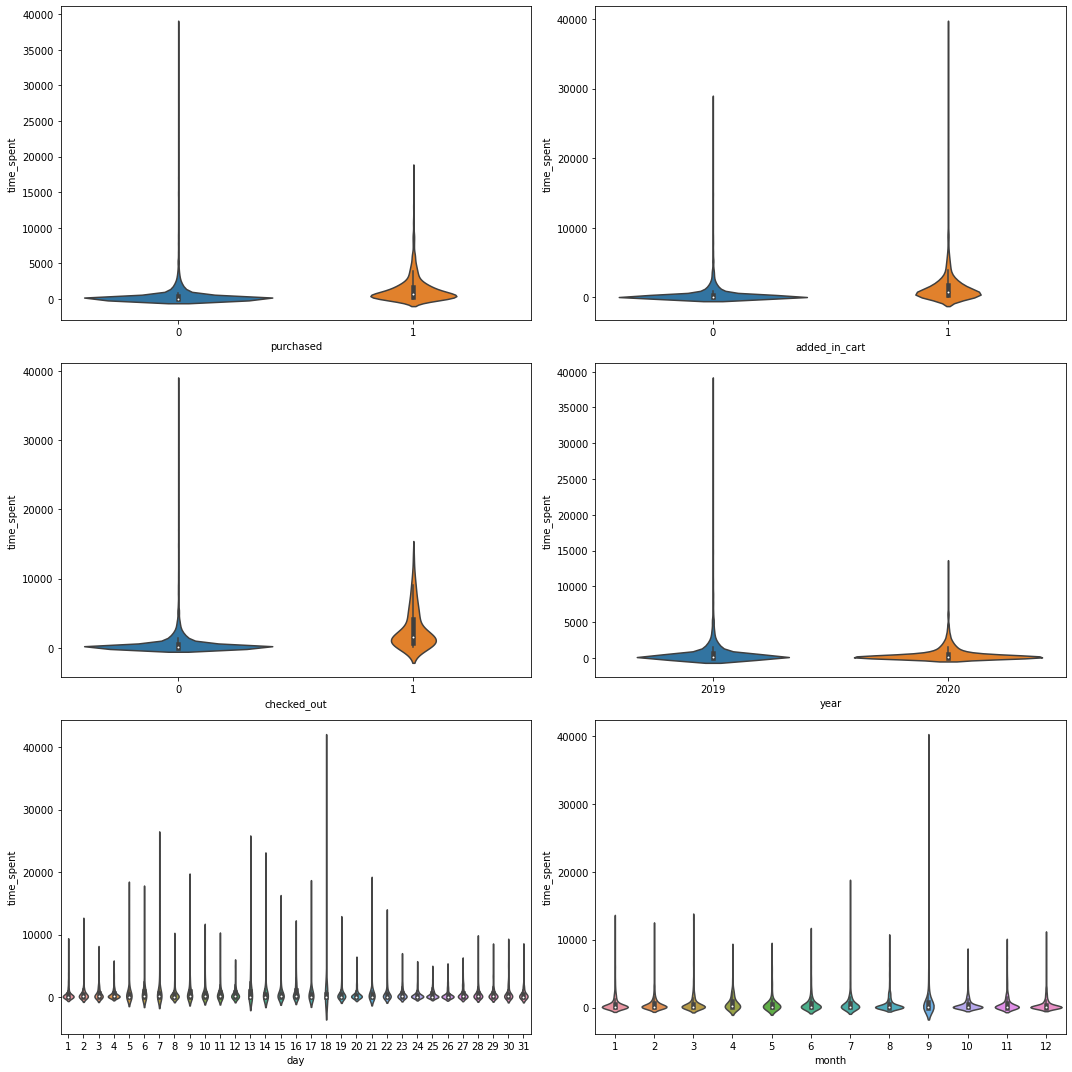

In [ ]:
fig,axs = plt.subplots(3,2,figsize=(15,15))
sns.violinplot(x='purchased',y='time_spent',data=df,ax=axs[0, 0])
sns.violinplot(x='added_in_cart',y='time_spent',data=df,ax=axs[0, 1])
sns.violinplot(x='checked_out',y='time_spent',data=df,ax=axs[1, 0])
sns.violinplot(x='year',y='time_spent',data=df,ax=axs[1, 1])
sns.violinplot(x='day',y='time_spent',data=df,ax=axs[2, 0])
sns.violinplot(x='month',y='time_spent',data=df,ax=axs[2, 1])
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

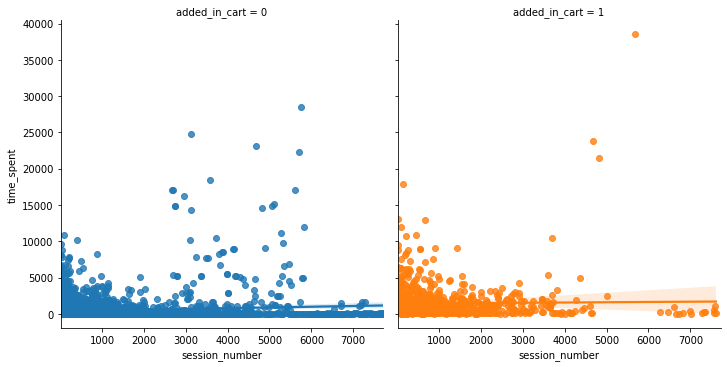

In [ ]:
fig,axs = plt.subplots(000)
sns.lmplot(x="session_number", y="time_spent", data=df,col="added_in_cart", hue="added_in_cart")

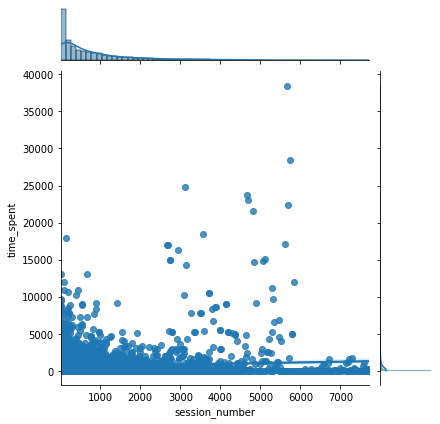

In [ ]:
sns.jointplot(x="session_number", y="time_spent", data=df, kind="reg")

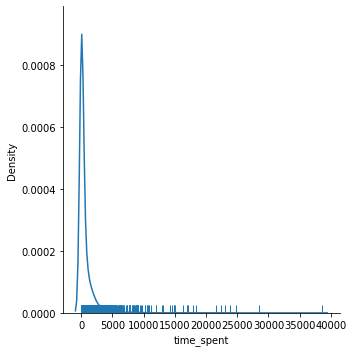

In [ ]:
sns.displot(x=df['time_spent'],kind="kde",rug=True)

In [ ]:
Q1 = train.quantile(0.00)
Q3 = train.quantile(0.89)
IQR = Q3 - Q1
print(IQR)

session_number             2849.00000
purchased                     1.00000
added_in_cart                 1.00000
checked_out                   0.00000
time_spent                 1603.96212
year                          1.00000
month                        11.00000
day                          27.00000
purchased_MinPrice            2.64700
added_in_cart_MaxPrice    10055.01100
checked_out_mean              0.00000
dtype: float64


In [ ]:
train=train[train['time_spent']<10000]

In [ ]:
df=df.drop(labels=['time_spent','session_id'], axis=1)

In [ ]:
df=df.drop(labels=['date'], axis=1)

In [ ]:
df.head()

,session_number,device_details,purchased,added_in_cart,checked_out,year,month,day,purchased_MinPrice,added_in_cart_MaxPrice,checked_out_mean
0,715,Desktop - Chrome,1,0,0,2020,1,22,17.047,28439.014,627.116932
1,55,iPhone - iOS,1,0,0,2020,2,27,17.047,28439.014,627.116932
2,11,iPhone - MobileWeb,0,0,0,2019,8,1,14.400,28439.014,627.116932
3,2794,Desktop - IE,0,1,0,2019,12,30,14.400,38494.025,627.116932
4,3674,iPhone - Web,0,0,0,2019,9,10,14.400,28439.014,627.116932


In [ ]:
df['device_details'].unique()

array(['Desktop - Chrome', 'iPhone - iOS', 'iPhone - MobileWeb',
       'Desktop - IE', 'iPhone - Web', 'Android Phone - Android',
       'Desktop - Firefox', 'Android Tablet - Web', 'iPad - Web',
       'Other - Other', 'Desktop - Safari', 'Android Phone - Web',
       'iPad - iOS', 'Android Phone - MobileWeb', 'Unknown - MobileWeb',
       'Android Tablet - Android', 'Android Tablet - MobileWeb'],
      dtype=object)

In [ ]:
cat=df['device_details'].to_list()
cat=np.reshape(cat,(-1,1))
enc=OneHotEncoder(sparse=False)
ord=enc.fit_transform(cat)

In [ ]:
ord.shape

(7756, 17)

In [ ]:
df['year'].unique()

array([2020, 2019])

In [ ]:
map_year={2020:0,2019:1}
df['year']=df['year'].map(map_year)

In [ ]:
df=df.drop(labels='device_details', axis=1)

In [ ]:
a=np.array(df)
total=np.concatenate([a,ord], axis=1)

In [ ]:
total.shape

(7756, 27)

In [ ]:
train_df=total[:5429]
test_df=total[5429:]

In [ ]:
print(train_df.shape)
print(test_df.shape)

(5429, 27)
(2327, 27)


In [ ]:
X=train_df
y=train['time_spent'].values

In [ ]:
print(X.shape)
print(y.shape)

(5429, 27)
(5429,)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

In [ ]:
pt_X=PowerTransformer()
pt_y=PowerTransformer()
X=pt_X.fit_transform(X)
y=pt_y.fit_transform(np.reshape(y,(-1,1)))

In [ ]:
 #clf1 = RandomForestRegressor(n_estimators=1500, criterion='mse', max_depth=14, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', max_leaf_nodes=5, min_impurity_decrease=0.2, bootstrap=True, 
                                 oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, 
                                 ccp_alpha=0.0, max_samples=None)



   clf3=KNeighborsRegressor(n_neighbors=3, metric='euclidean')



    #vr=VotingRegressor([('rf',clf1),('xgb',clf2),('kn',clf3)])



   clf2=xgb.XGBRegressor(max_depth=13, learning_rate=0.1, n_estimators=2000, verbosity=1, silent=None, objective='reg:squarederror', booster='gbtree', 
                          n_jobs=-1, nthread=None, gamma=0.3, min_child_weight=1, colsample_bytree=0.5, colsample_bylevel=0.5, 
                          colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5,rate_drop=0.3,eval_metri='rmsle')
    

In [ ]:
## Random Forrest Regressor

In [ ]:
Cross Validation
The technique of cross validation (CV) is best explained by example using the most common method, K-Fold CV. 
When we approach a machine learning problem, we make sure to split our data into a training and a testing set. 
In K-Fold CV, we further split our training set into K number of subsets, called folds. We then iteratively fit the model K times, 
each time training the data on K-1 of the folds and evaluating on the Kth fold (called the validation data). 
As an example, consider fitting a model with K = 5. The first iteration we train on the first four folds and evaluate on the fifth. 
The second time we train on the first, second, third, and fifth fold and evaluate on the fourth. We repeat this procedure 3 more times,
 each time evaluating on a different fold. At the very end of training, we average the performance on each of the folds to come up 
 with final validation metrics for the model.


n_estimators = number of trees in the foreset

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

n_jobs : this parameter tells the engine how many processors is it allowed to use. A value of “-1” means 
there is no restriction whereas a value of “1” means it can only use one processor

oob_score:-t is very similar to leave one out validation technique, however, this is so much faster. 
This method simply tags every observation used in different tress. 
And then it finds out a maximum vote score for every observation based on only trees which did not use this particular observation to train itself.


min_weight_fraction_leaf:-The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. 
Samples have equal weight when sample_weight is not provided.

max_leaf_nodes:-Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
If None then unlimited number of leaf nodes.


min_impurity_decrease:-A node will be split if this split induces a decrease of the impurity greater than or equal to this value.



The R2 score of train -0.10417712221222564
The R2 score of test -0.1423193172274957
 RMSLE Error on Test 1.7522604435752056
RMSE Error on Test 1346.024338388477
**************************************************
The R2 score of train -0.10905448429388764
The R2 score of test -0.09770662010165387
 RMSLE Error on Test 1.798101390157055
RMSE Error on Test 2022.7008205499658
**************************************************
The R2 score of train -0.1038740737645254
The R2 score of test -0.13106046148530415
 RMSLE Error on Test 1.868285504039458
RMSE Error on Test 1920.4203182043718
**************************************************
The R2 score of train -0.11215720053044387
The R2 score of test -0.09075974101813333
 RMSLE Error on Test 1.813887083596934
RMSE Error on Test 2187.2390700170995
**************************************************
The R2 score of train -0.10709646007186846
The R2 score of test -0.10362193891936022
 RMSLE Error on Test 1.780725191149365
RMSE Error on Test 1781.41

,True_target,pred_target,error
0,21.704,104.47116,-82.76716
1,1164.877,104.47116,1060.40584
2,19.439,104.47116,-85.03216
3,291.791,104.47116,187.31984
4,22.396,104.47116,-82.07516
5,2004.298,104.47116,1899.82684
6,2348.062,104.47116,2243.59084
7,177.392,104.47116,72.92084
8,326.518,104.47116,222.04684
9,20.976,104.47116,-83.49516


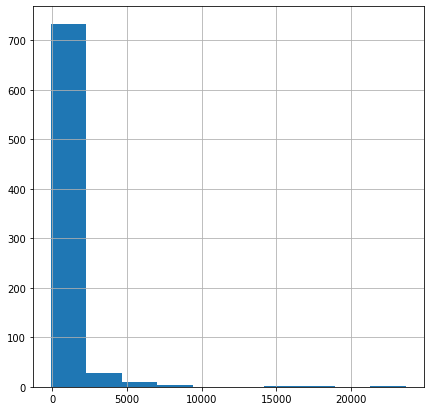

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=7, random_state=56, shuffle=True)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf1 = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=4, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', max_leaf_nodes=5, min_impurity_decrease=0.2, bootstrap=True, 
                                 oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, 
                                 ccp_alpha=0.0, max_samples=None)

    model=clf1.fit(X_train,y_train)
    pred_train=model.predict(X_train)
    pred_test=model.predict(X_test)
    y_test=pt_y.inverse_transform(y_test)
    y_train=pt_y.inverse_transform(y_train)
    pred_train=pt_y.inverse_transform(np.reshape(pred_train,(-1,1)))
    pred_test=pt_y.inverse_transform(np.reshape(pred_test,(-1,1)))
    print("The R2 score of train",r2_score(y_train,pred_train))
    print("The R2 score of test",r2_score(y_test,pred_test))
    rmsle=np.sqrt(mean_squared_log_error(y_test,pred_test))
    print(" RMSLE Error on Test",rmsle)
    rmse=np.sqrt(mean_squared_error(y_test,pred_test))
    print("RMSE Error on Test",rmse)
    print('*'*50)
df=pd.DataFrame(y_test, columns=['True_target'])
df['pred_target']=pred_test
df['error']=df['True_target']-df['pred_target'] 
df['error'].hist(figsize=(7,7))
df.head(60) 

In [ ]:
####K neighbours Regressor

In [ ]:
n_neighbors:- Number of neighbors to use by default for kneighbors queries.
metric:-the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
weights:-uniform : uniform weights. All points in each neighborhood are weighted equally.
distance : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

The R2 score of train 0.028497978350312536
The R2 score of test 0.04703156935595021
 RMSLE Error on Test 1.4193652816506956
RMSE Error on Test 1229.4147212679175
**************************************************
The R2 score of train 0.030062853223179697
The R2 score of test -0.0025608043429168337
 RMSLE Error on Test 1.4060814281117517
RMSE Error on Test 1933.0534815686256
**************************************************
The R2 score of train 0.031528751973161295
The R2 score of test -0.018205851550572083
 RMSLE Error on Test 1.4971756926379884
RMSE Error on Test 1822.0956695725274
**************************************************
The R2 score of train 0.025034852046543765
The R2 score of test 0.0006359432379756669
 RMSLE Error on Test 1.438767088488326
RMSE Error on Test 2093.5993155605356
**************************************************
The R2 score of train 0.025105560190283427
The R2 score of test 0.03929034071770776
 RMSLE Error on Test 1.389506067470267
RMSE Error on Test 

,True_target,pred_target,error
0,21.704,48.408521,-26.704521
1,1164.877,174.087694,990.789306
2,19.439,52.794613,-33.355613
3,291.791,90.277513,201.513487
4,22.396,23.743052,-1.347052
5,2004.298,234.805147,1769.492853
6,2348.062,246.115076,2101.946924
7,177.392,112.761544,64.630456
8,326.518,134.665342,191.852658
9,20.976,39.360575,-18.384575


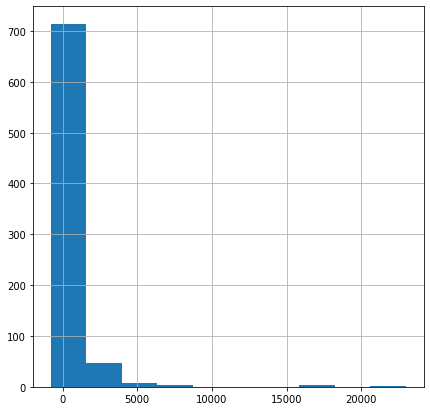

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=7, random_state=56, shuffle=True)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf3=KNeighborsRegressor(n_neighbors=20, metric='euclidean')
    model=clf3.fit(X_train,y_train)
    pred_train=model.predict(X_train)
    pred_test=model.predict(X_test)
    y_test=pt_y.inverse_transform(y_test)
    y_train=pt_y.inverse_transform(y_train)
    pred_train=pt_y.inverse_transform(np.reshape(pred_train,(-1,1)))
    pred_test=pt_y.inverse_transform(np.reshape(pred_test,(-1,1)))
    print("The R2 score of train",r2_score(y_train,pred_train))
    print("The R2 score of test",r2_score(y_test,pred_test))
    rmsle=np.sqrt(mean_squared_log_error(y_test,pred_test))
    print(" RMSLE Error on Test",rmsle)
    rmse=np.sqrt(mean_squared_error(y_test,pred_test))
    print("RMSE Error on Test",rmse)
    print('*'*50)
df=pd.DataFrame(y_test, columns=['True_target'])
df['pred_target']=pred_test
df['error']=df['True_target']-df['pred_target'] 
df['error'].hist(figsize=(7,7))
df.head(60) 

In [ ]:
### XGBREGRESSSOR

In [ ]:
booster:-gbtree: tree-based models

min_child_weight:- Defines the minimum sum of weights of all observations required in a child.
This is similar to min_child_leaf in GBM but not exactly. This refers to min “sum of weights” of observations while GBM has min “number of observations”.
Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree

colsample_bytree:-Similar to max_features in GBM. Denotes the fraction of columns to be randomly samples for each tree.
Typical values: 0.5-1


colsample_bylevel:-Denotes the subsample ratio of columns for each split, in each level.
I don’t use this often because subsample and colsample_bytree will do the job for you. but you can explore further if you feel so.

objective:-reg:squarederror


eval_metric:-The metric to be used for validation data.


reg_lambda= L2 regularization term on weights (analogous to Ridge regression)

reg_alpha=L1 regularization term on weight (analogous to Lasso regression)
Can be used in case of very high dimensionality so that the algorithm runs faster when implemented







The R2 score of train -0.029989735373849635
The R2 score of test -0.015402707702468543
 RMSLE Error on Test 1.6937800164146257
RMSE Error on Test 1269.0487650595264
**************************************************
The R2 score of train -0.02830409159295799
The R2 score of test -0.03449745597268228
 RMSLE Error on Test 1.7138161241716
RMSE Error on Test 1963.6008998485645
**************************************************
The R2 score of train -0.02513309242192463
The R2 score of test -0.05666486907254842
 RMSLE Error on Test 1.7284557442345603
RMSE Error on Test 1856.1882365157835
**************************************************
The R2 score of train -0.029879217609873443
The R2 score of test -0.02695126906846146
 RMSLE Error on Test 1.6980704761948227
RMSE Error on Test 2122.2992610978486
**************************************************
The R2 score of train -0.029582531607881934
The R2 score of test -0.022875414318716647
 RMSLE Error on Test 1.7223516631538411
RMSE Error on Tes

,True_target,pred_target,error
0,21.704,164.447174,-142.743174
1,1164.877,190.418274,974.458726
2,19.439,200.018921,-180.579921
3,291.791,227.295746,64.495254
4,22.396,173.737701,-151.341701
5,2004.298,345.823242,1658.474758
6,2348.062,324.825104,2023.236896
7,177.392,222.663330,-45.271330
8,326.518,234.240128,92.277872
9,20.976,175.607101,-154.631101


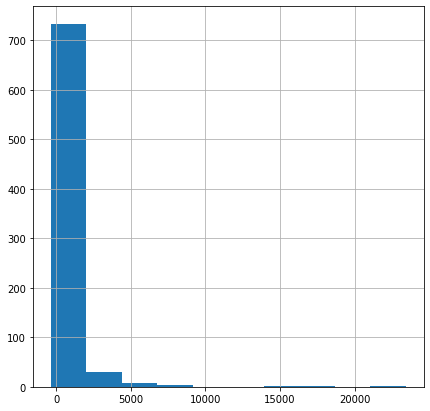

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=7, random_state=56, shuffle=True)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf1 = xgb.XGBRegressor(max_depth=5, learning_rate=0.01, n_estimators=50, verbosity=1, silent=None, objective='reg:squarederror', booster='gbtree', 
  n_jobs=-1, nthread=None, min_child_weight=1, colsample_bytree=0.5, colsample_bylevel=0.5, 
  colsample_bynode=1, reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, base_score=0.8,eval_metri='rmsle')
    model=clf1.fit(X_train,y_train)
    pred_train=np.round(model.predict(X_train),3)
    pred_test=np.round(model.predict(X_test),3)
    y_test=pt_y.inverse_transform(y_test)
    y_train=pt_y.inverse_transform(y_train)
    pred_train=pt_y.inverse_transform(np.reshape(pred_train,(-1,1)))
    pred_test=pt_y.inverse_transform(np.reshape(pred_test,(-1,1)))
    print("The R2 score of train",r2_score(y_train,pred_train))
    print("The R2 score of test",r2_score(y_test,pred_test))
    rmsle=np.sqrt(mean_squared_log_error(y_test,pred_test))
    print(" RMSLE Error on Test",rmsle)
    rmse=np.sqrt(mean_squared_error(y_test,pred_test))
    print("RMSE Error on Test",rmse)
    print('*'*50)
df=pd.DataFrame(y_test, columns=['True_target'])
df['pred_target']=pred_test
df['error']=df['True_target']-df['pred_target'] 
df['error'].hist(figsize=(7,7))
df.head(60)  

In [ ]:
## VotingRegressor

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=7, random_state=56, shuffle=True)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    vr = vr=VotingRegressor([('rf',clf1),('xgb',clf2),('kn',clf3)])
    model=vr.fit(X_train,y_train)
    pred_train=np.round(model.predict(X_train),3)
    pred_test=np.round(model.predict(X_test),3)
    y_test=pt_y.inverse_transform(y_test)
    y_train=pt_y.inverse_transform(y_train)
    pred_train=pt_y.inverse_transform(np.reshape(pred_train,(-1,1)))
    pred_test=pt_y.inverse_transform(np.reshape(pred_test,(-1,1)))
    print("The R2 score of train",r2_score(y_train,pred_train))
    print("The R2 score of test",r2_score(y_test,pred_test))
    rmsle=np.sqrt(mean_squared_log_error(y_test,pred_test))
    print(" RMSLE Error on Test",rmsle)
    rmse=np.sqrt(mean_squared_error(y_test,pred_test))
    print("RMSE Error on Test",rmse)
    print('*'*50)
df=pd.DataFrame(y_test, columns=['True_target'])
df['pred_target']=pred_test
df['error']=df['True_target']-df['pred_target'] 
df['error'].hist(figsize=(7,7))
df.head(60)  

NameError: ignored

In [ ]:
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function:

1 / (2 * n_samples) * ||y - Xw||^2_2
+ alpha * l1_ratio * ||w||_1
+ 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
If you are interested in controlling the L1 and L2 penalty separately, keep in mind that this is equivalent to:

a * L1 + b * L2

In [ ]:
from sklearn.linear_model import ElasticNet

The R2 score of train -0.09274385677899533
The R2 score of test -0.12054536532704674
 RMSLE Error on Test 1.6293076615353264
RMSE Error on Test 1333.1342128214064
**************************************************
The R2 score of train -0.09680978405772511
The R2 score of test -0.08763684687807927
 RMSLE Error on Test 1.6739494003710225
RMSE Error on Test 2013.401857931184
**************************************************
The R2 score of train -0.09111619891504197
The R2 score of test -0.1222835296250393
 RMSLE Error on Test 1.762985091684547
RMSE Error on Test 1912.9546585641833
**************************************************
The R2 score of train -0.10034411666094756
The R2 score of test -0.07986622083311401
 RMSLE Error on Test 1.680906626838742
RMSE Error on Test 2176.2895818072957
**************************************************
The R2 score of train -0.09539495226848249
The R2 score of test -0.09034367726420212
 RMSLE Error on Test 1.654866782808676
RMSE Error on Test 1770.

,True_target,pred_target,error
0,21.704,90.260202,-68.556202
1,1164.877,90.260202,1074.616798
2,19.439,90.260202,-70.821202
3,291.791,90.260202,201.530798
4,22.396,90.260202,-67.864202
5,2004.298,138.727609,1865.570391
6,2348.062,146.562364,2201.499636
7,177.392,90.260202,87.131798
8,326.518,90.260202,236.257798
9,20.976,90.260202,-69.284202


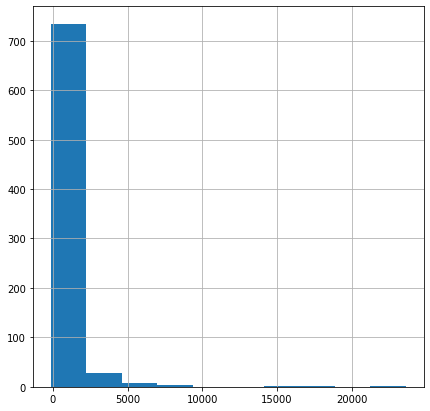

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=7, random_state=56, shuffle=True)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    vr =ElasticNet(alpha=0.8,l1_ratio=0.3,max_iter=2000,tol=0.00003)
    model=vr.fit(X_train,y_train)
    pred_train=np.round(model.predict(X_train),3)
    pred_test=np.round(model.predict(X_test),3)
    y_test=pt_y.inverse_transform(y_test)
    y_train=pt_y.inverse_transform(y_train)
    pred_train=pt_y.inverse_transform(np.reshape(pred_train,(-1,1)))
    pred_test=pt_y.inverse_transform(np.reshape(pred_test,(-1,1)))
    print("The R2 score of train",r2_score(y_train,pred_train))
    print("The R2 score of test",r2_score(y_test,pred_test))
    rmsle=np.sqrt(mean_squared_log_error(y_test,pred_test))
    print(" RMSLE Error on Test",rmsle)
    rmse=np.sqrt(mean_squared_error(y_test,pred_test))
    print("RMSE Error on Test",rmse)
    print('*'*50)
df=pd.DataFrame(y_test, columns=['True_target'])
df['pred_target']=pred_test
df['error']=df['True_target']-df['pred_target'] 
df['error'].hist(figsize=(7,7))
df.head(60)

In [ ]:
def error_histogram(y_pred,y_test):    
    MAE = abs(y_pred-y_test)
    MAE = MAE[:(len(MAE)-1)]
    print('min', y_test.min())
    print('max', y_test.max())
    print('MAE max', MAE.max())
    print('MAE min', MAE.min())
    MAE = [i for i in MAE if i<10 ]
    return sns.distplot(MAE,bins=50)


min 16.06000000000001
max 23761.824999999964
MAE max 23187.092211914027
MAE min 0.5474399414060827


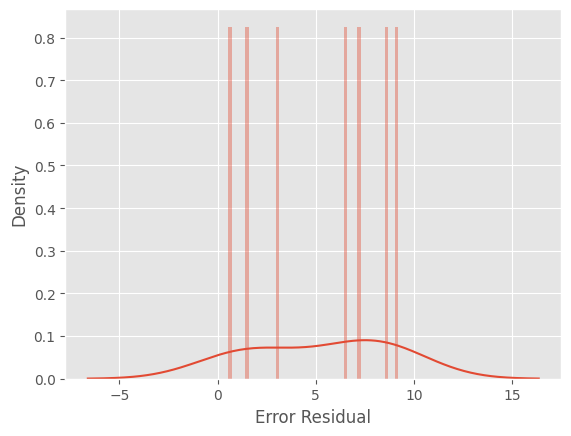

In [ ]:
plt.figure()
ax = error_histogram(pred_test,y_test)
ax.set(xlabel="Error Residual")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0.28606251399507443
0.22858901314979463


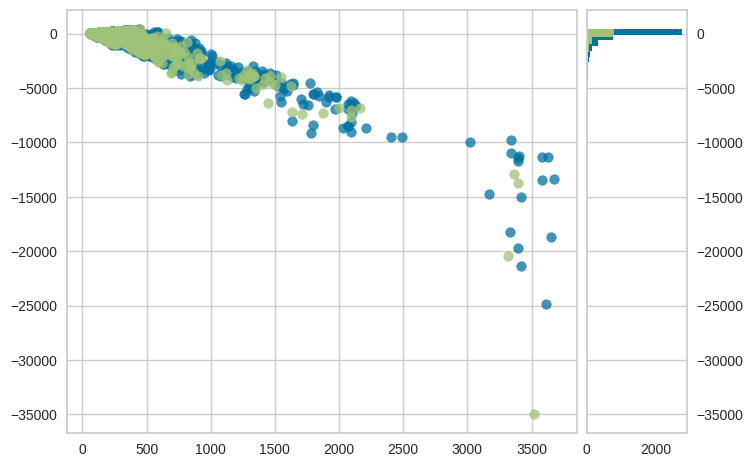

In [ ]:
from yellowbrick.regressor import ResidualsPlot

clf1 = xgb.XGBRegressor(max_depth=5, learning_rate=0.01, n_estimators=50, verbosity=1, silent=None, objective='reg:squarederror', booster='gbtree', 
  n_jobs=-1, nthread=None, min_child_weight=1, colsample_bytree=0.5, colsample_bylevel=0.5, 
  colsample_bynode=1, reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, base_score=0.8,eval_metri='rmsle')

visualizer = ResidualsPlot(clf1)


visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 
print(visualizer.train_score_)
print(visualizer.test_score_)

0.22858901314979463

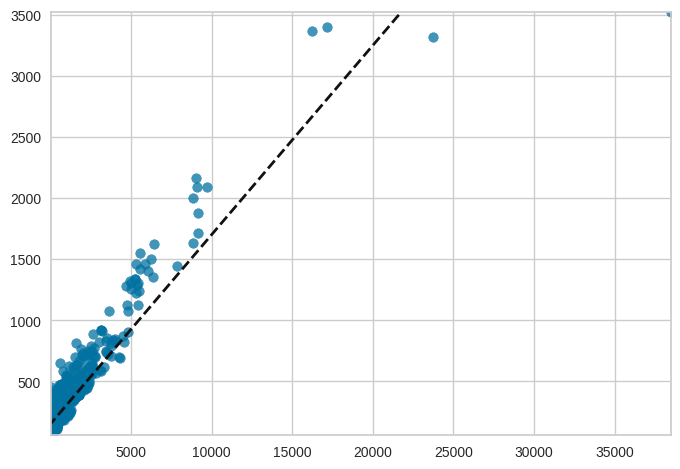

In [ ]:
from yellowbrick.regressor import PredictionError

clf1 = xgb.XGBRegressor(max_depth=5, learning_rate=0.01, n_estimators=50, verbosity=1, silent=None, objective='reg:squarederror', booster='gbtree', 
  n_jobs=-1, nthread=None, min_child_weight=1, colsample_bytree=0.5, colsample_bylevel=0.5, 
  colsample_bynode=1, reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, base_score=0.8,eval_metri='rmsle')

visualizer = PredictionError(clf1)


visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 


ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa610219518>,
                cv=7, groups=None, logx=False, model=None, n_jobs=1,
                param_name='max_depth',
                param_range=array([1, 2, 3, 4, 5, 6, 7]), pre_dispatch='all',
                scoring='r2')

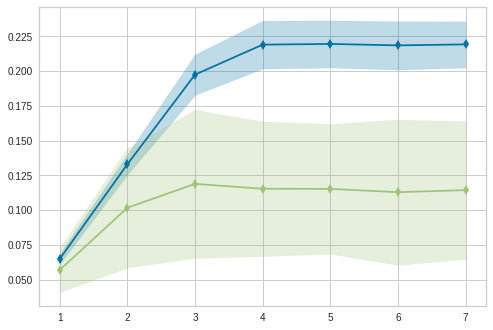

In [ ]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.tree import DecisionTreeRegressor

viz = ValidationCurve(clf1, param_name="max_depth",param_range=np.arange(1, 8), cv=7, scoring="r2")

viz.fit(X_train, y_train)


In [ ]:
viz.fit(X_test, y_test)
print(viz.train_scores_mean_)
print(viz.test_scores_mean_)

[0.55084871 0.87085564 0.97162935 0.99395657 0.99846261 0.999673
 0.99993379]
[0.14162185 0.54672549 0.72091146 0.92044428 0.82360557 0.95413085
 0.81163747]


LearningCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa60a829128>,
              cv=None, exploit_incremental_learning=False, groups=None,
              model=None, n_jobs=1, pre_dispatch='all', random_state=None,
              scoring='r2', shuffle=False,
              train_sizes=array([0.1  , 0.325, 0.55 , 0.775, 1.   ]))

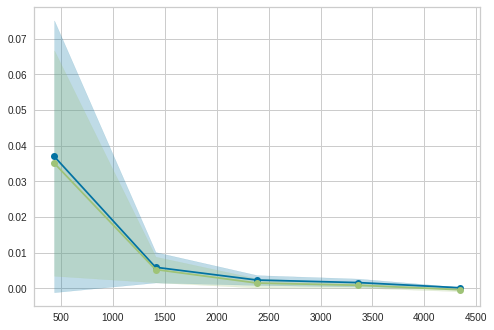

In [ ]:
from yellowbrick.model_selection import LearningCurve
model = RandomForestRegressor(n_estimators=1500, criterion='mse', max_depth=14, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', max_leaf_nodes=5, min_impurity_decrease=0.2, bootstrap=True, 
                                 oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, 
                                 ccp_alpha=0.0, max_samples=None)
visualizer = LearningCurve(model, scoring='r2')
visualizer.fit(X, y)       


In [ ]:
test_df=pt_X.fit_transform(test_df)
pred=model.predict(test_df)
pred=pt_y.inverse_transform(np.reshape(pred,(-1,1)))

In [ ]:
pred

array([342.76447, 199.8653 , 354.16565, ..., 201.78462, 338.29596,
       367.0208 ], dtype=float32)

In [ ]:
sub_df=pd.DataFrame(pred, columns=['time_spent'])
sub_df.to_csv('submission.csv',index=False)

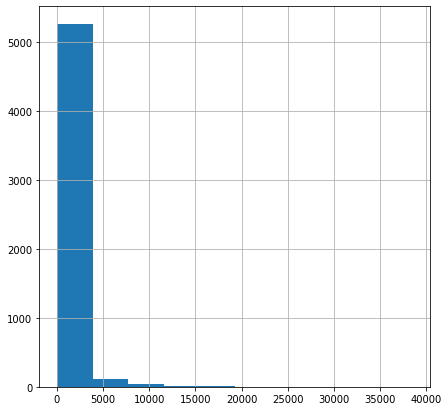

In [ ]:
train['time_spent'].hist(figsize=(7,7))

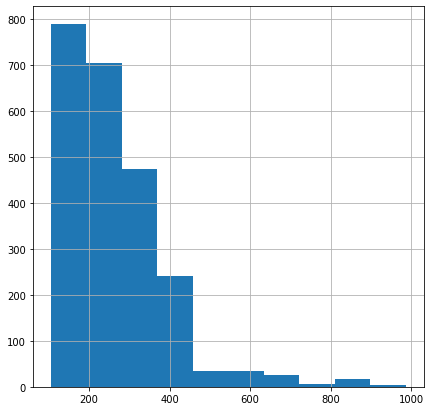

In [ ]:
sub_df['time_spent'].hist(figsize=(7,7))